In [1]:
import seibot.data
import seibot.isolation_system

config = "../config/example_config.ini"
data = seibot.data.Data(config)

In [2]:
f = data.f
relative_sensor = seibot.isolation_system.Sensor(f, data.relative_sensor_noise)
inertial_sensor = seibot.isolation_system.Sensor(f, data.inertial_sensor_noise)
seismometer = seibot.isolation_system.Sensor(f, data.seismometer_noise)
seismic_noise = data.seismic_noise
plant = seibot.isolation_system.Process(data.plant)
transmissivity = seibot.isolation_system.Process(data.transmissivity)
controller = seibot.isolation_system.Process(data.controller)

In [3]:
ham8 = seibot.isolation_system.IsolationSystem(
    relative_sensor=relative_sensor, inertial_sensor=inertial_sensor,
    seismometer=seismometer, plant=plant, transmissivity=transmissivity,
    controller=controller)

In [4]:
import seibot.filter

inv_filts = seibot.filter.InverseFilters()
gs13_inverse_filter = getattr(inv_filts, "gs13")
sts_inverse_filter = getattr(inv_filts, "sts")
# print(gs13_inverse_filter)
# print(sts_inverse_filter)

In [5]:
sc_pool = seibot.filter.FilterPool("../config/sensor_correction_filters.ini", inverse_filter=sts_inverse_filter)
lp_pool = seibot.filter.FilterPool("../config/low_pass_filters.ini")
hp_pool = seibot.filter.FilterPool("../config/high_pass_filters.ini", inverse_filter=gs13_inverse_filter)

filter_configurations = seibot.filter.FilterConfigurations(sc_pool=sc_pool, lp_pool=lp_pool, hp_pool=hp_pool)

In [6]:
import seibot.evaluate

evaluate = seibot.evaluate.Evaluate(isolation_system=ham8, filter_configurations=filter_configurations, f=f, seismic_noise=seismic_noise)

In [7]:
import numpy as np
a = np.empty(np.shape(evaluate.displacement_matrix[:, :, 0]))


In [8]:
len(a[0])

9

In [10]:
filter_config = evaluate.min_rms_displacement()

In [18]:
m = global()[evaluate, "min_rms_displacement")

In [20]:
m()

{'sensor correction filter': TransferFunction(array([3.63746342e+03, 2.77573152e+05, 1.53352677e+07, 4.42087810e+08,
        9.39379026e+09, 8.99956339e+10, 5.49476060e+11, 2.25994290e+12,
        6.48754929e+12, 1.28960493e+13, 1.68124751e+13, 1.38926037e+13,
        7.66435609e+12, 2.88468934e+12, 7.35497747e+11, 1.21562284e+11,
        1.16515246e+10, 4.85659639e+08, 4.44229026e+06, 5.35677051e+04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([3.65295239e+03, 2.80013533e+05, 1.55390910e+07, 4.50464058e+08,
        9.62267200e+09, 9.30976828e+10, 5.70656944e+11, 2.35724169e+12,
        6.79735254e+12, 1.36194923e+13, 1.80781991e+13, 1.54755746e+13,
        9.08044549e+12, 3.82118837e+12, 1.18693488e+12, 2.75323084e+11,
        4.74795844e+10, 5.92649094e+09, 5.02725725e+08, 2.54193115e+07,
        5.83493498e+05, 5.95625382e+03, 2.22957811e+01, 0.00000000e+00])),
 'low pass filter': TransferFunction(array([5.33237025e-03, 5.31060483e+00, 4.62898652e

In [13]:
sc = filter_config["sensor correction filter"]
lp = filter_config["low pass filter"]
hp = filter_config["high pass filter"]

In [15]:
ham8.filter_configuration = filter_config

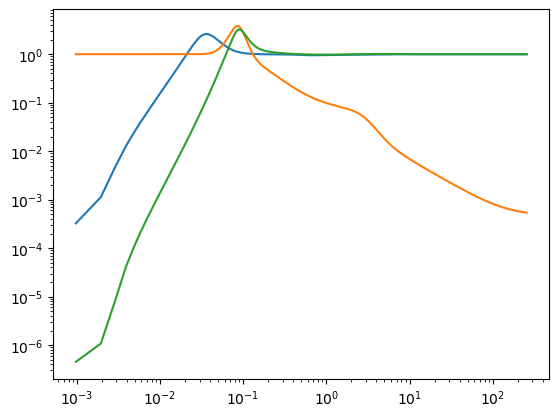

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.loglog(f, abs(sc(1j*2*np.pi*f)))
plt.loglog(f, abs(lp(1j*2*np.pi*f)))
plt.loglog(f, abs(hp(1j*2*np.pi*f)))

In [16]:
displacement = ham8.get_displacement(f, seismic_noise)

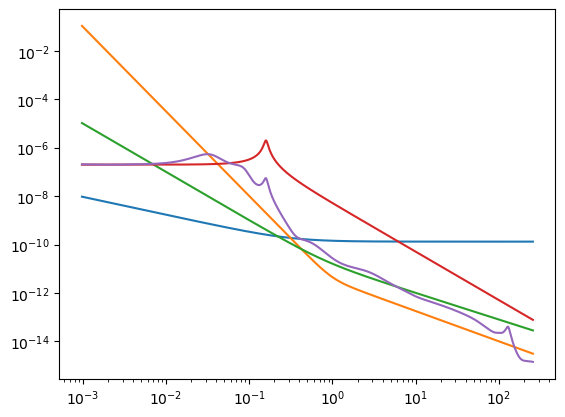

In [17]:
plt.loglog(f, relative_sensor.noise)
plt.loglog(f, inertial_sensor.noise)
plt.loglog(f, seismometer.noise)
plt.loglog(f, seismic_noise)
plt.loglog(f, displacement)
# plt.loglog(f, abs(plant(1j*2*np.pi*f)))
# plt.loglog(f, abs(transmissivity(1j*2*np.pi*f)))
# plt.loglog(f, abs(controller(1j*2*np.pi*f)))

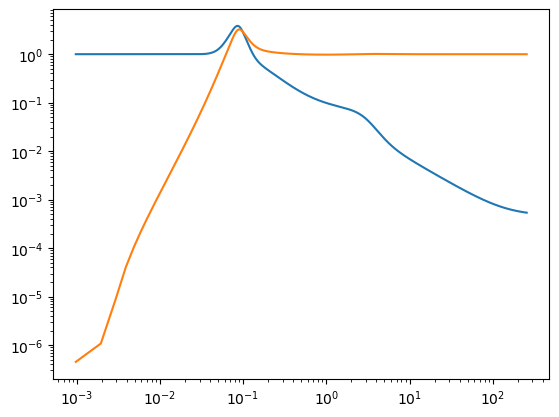

In [11]:
plt.loglog(f, abs(ham8.low_pass_filter(1j*2*np.pi*f)))
plt.loglog(f, abs(ham8.high_pass_filter(1j*2*np.pi*f)))